### Helpers

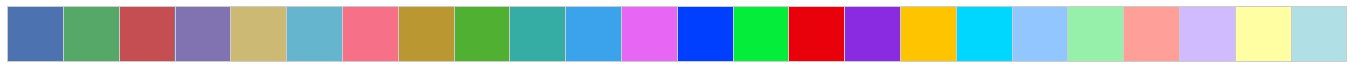

In [10]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.stats as sts
import seaborn as sns
import scoring
from IPython.display import display

sns.set()
sns.set_style("whitegrid")

color_palette = sns.color_palette('deep') + sns.color_palette('husl', 6) + sns.color_palette('bright') + sns.color_palette('pastel')

%matplotlib inline
sns.palplot(color_palette)

def ndprint(a, precision=3):
    with np.printoptions(precision=precision, suppress=True):
        print(a)

### Reading

In [18]:
N_STATIONS = 4

# train cols
unused_train_cols = ['particle_type', 'kinWeight', 'sWeight']
train_cols = ['label', 'weight']
ALL_TRAIN_COLS = train_cols + unused_train_cols

# original cols
x_cols = ['MatchedHit_X[%i]' % i for i in range(N_STATIONS)]
y_cols = ['MatchedHit_Y[%i]' % i for i in range(N_STATIONS)]
z_cols = ['MatchedHit_Z[%i]' % i for i in range(N_STATIONS)]
xy_cols = x_cols + y_cols
xyz_cols = x_cols + y_cols + z_cols
dx_cols = ['MatchedHit_DX[%i]' % i for i in range(N_STATIONS)]
dy_cols = ['MatchedHit_DY[%i]' % i for i in range(N_STATIONS)]
dz_cols = ['MatchedHit_DZ[%i]' % i for i in range(N_STATIONS)]
dxyz_cols = dx_cols + dy_cols + dz_cols

ex_cols = ['Lextra_X[%i]' % i for i in range(N_STATIONS)]
ey_cols = ['Lextra_Y[%i]' % i for i in range(N_STATIONS)]
exy_cols = ex_cols + ey_cols
edx_cols = ['Mextra_DX2[%i]' % i for i in range(N_STATIONS)]
edy_cols = ['Mextra_DY2[%i]' % i for i in range(N_STATIONS)]
edxy_cols = edx_cols + edy_cols

t_cols = ['MatchedHit_T[%i]' % i for i in range(N_STATIONS)]
dt_cols = ['MatchedHit_DT[%i]' % i for i in range(N_STATIONS)]

hit_type_cols = ['MatchedHit_TYPE[%i]' % i for i in range(N_STATIONS)]
mom_cols = ['P', 'PT']
hit_stats_cols = ['FOI_hits_N', 'NShared', 'ndof']

ncl_cols = ['ncl[%i]' % i for i in range(N_STATIONS)]
avg_cs_cols = ['avg_cs[%i]' % i for i in range(N_STATIONS)]

# foi cols
foi_xyz_cols = ["FOI_hits_X", "FOI_hits_Y", "FOI_hits_Z"]
foi_dxyz_cols = ["FOI_hits_DX", "FOI_hits_DY", "FOI_hits_DZ"]
foi_ts_cols = ["FOI_hits_T", "FOI_hits_DT", "FOI_hits_S"]
foi_cols = foi_xyz_cols + foi_dxyz_cols + foi_ts_cols

# derivative cols
pca_x_cols = ['PCA_X[%i]' % i for i in range(N_STATIONS)]
pca_y_cols = ['PCA_Y[%i]' % i for i in range(N_STATIONS)]
pca_z_cols = ['PCA_Z[%i]' % i for i in range(N_STATIONS)]
pca_xyz_cols = pca_x_cols + pca_y_cols + pca_z_cols

nerr_x_cols = ['NErr_X[%i]' % i for i in range(N_STATIONS)]
nerr_y_cols = ['NErr_Y[%i]' % i for i in range(N_STATIONS)]
nerr_xy_cols = nerr_x_cols + nerr_y_cols

da_cols = ['DAngle[%d]' % i for i in range(1, 4)]
is_muon_cols = ['IsMuonTight']
prob_hit_detector_cols = ['ProbHit[%i]' % i for i in range(N_STATIONS)]
err_cols = ['ErrMSE', 'Chi2Quantile']

SIMPLE_FEATURE_COLS = xyz_cols + dxyz_cols + exy_cols + edxy_cols + t_cols + dt_cols + hit_type_cols + mom_cols + hit_stats_cols + ncl_cols + avg_cs_cols
ARR_FEATURE_COLS = foi_cols

In [19]:
len(SIMPLE_FEATURE_COLS + ARR_FEATURE_COLS + ALL_TRAIN_COLS)

79

### Convert csv to pickles

In [36]:
from itertools import repeat

def parse_float_array(line):
    return np.fromstring(line[1:-1], sep=" ", dtype=float_dtype)

def parse_int_array(line):
    return np.fromstring(line[1:-1], sep=" ", dtype=int_dtype)

filenames = ['data/train_part_1_v2.csv.gz', 'data/train_part_2_v2.csv.gz']
groups = {
    'sf': SIMPLE_FEATURE_COLS,
    'af': ARR_FEATURE_COLS,
    'tr': ALL_TRAIN_COLS
}

label_prefix = ['L0', 'L1']
na_values = ['-9999.0', '255']
int_dtype = np.int32
float_dtype = np.float32

converters = dict(zip(ARR_FEATURE_COLS, repeat(parse_float_array)))
converters[foi_ts_cols[-1]] = parse_int_array

types = dict(zip(SIMPLE_FEATURE_COLS + ALL_TRAIN_COLS, repeat(float_dtype)))
for col in unused_train_cols[:1] + train_cols[:1] + hit_stats_cols + ncl_cols + hit_type_cols:
    types[col] = int_dtype

for filename in filenames[:1]:
    for data in pd.read_csv(filename, nrows=1000, chunksize=1000, na_values=na_values, na_filter=False, converters=converters, dtype=types, usecols=ARR_FEATURE_COLS):
        display(data)
    

,FOI_hits_X,FOI_hits_Y,FOI_hits_Z,FOI_hits_DX,FOI_hits_DY,FOI_hits_DZ,FOI_hits_T,FOI_hits_DT,FOI_hits_S
0,"[-2685.08, -2583.08, -2954.3, -3376.97, -3140....","[1373.3481, 1373.3481, 1481.2622, 1590.3975, 1...","[15123.045, 15123.045, 16327.633, 17520.826, 1...","[25.5, 25.5, 27.5, 118.0, 118.0, 126.0]","[126.27855, 126.27855, 136.27849, 146.27841, 1...","[33.95495, 33.95495, 33.99096, 34.026966, 34.0...","[3.0, 11.0, 2.0, 7.0, 7.0, 5.0]","[0.0, 8.0, 0.0, 0.0, 0.0, 0.0]","[0, 0, 1, 2, 2, 3]"
1,"[739.55, 852.51, 827.0, 758.72]","[2387.7222, 2575.9746, 2764.1965, 2952.1033]","[15212.598, 16420.576, 17614.854, 18824.43]","[25.5, 27.5, 118.0, 756.0]","[126.27855, 136.27849, 146.27841, 156.27835]","[33.95495, 33.99096, 34.026966, 34.062977]","[9.0, 10.0, 8.0, 4.0]","[1.0, -1.0, 0.0, 4.0]","[0, 1, 2, 3]"
2,"[-1595.13, -681.58, -1775.95, -1761.95, -1748....","[-318.64474, -222.24156, -344.5297, -207.12927...","[15317.953, 15117.299, 16522.06, 16405.555, 16...","[12.75, 76.5, 13.75, 13.75, 13.75, 13.75, 20.7...","[63.078957, 31.479162, 68.078926, 68.078926, 6...","[33.727364, 33.613575, 33.74537, 33.74537, 33....","[10.0, 4.0, 13.0, 13.0, 3.0, 3.0, 15.0, 3.0, 5.0]","[0.0, 4.0, 10.0, 6.0, 0.0, -4.0, 15.0, 0.0, 0.0]","[0, 0, 1, 1, 1, 1, 1, 2, 3]"
3,"[-1708.8291, -1708.432, -1816.95, -1933.97, -2...","[-191.40443, -65.00588, -207.12927, -221.99326...","[15201.41, 15201.865, 16405.555, 17598.3, 1880...","[12.948485, 12.948485, 13.75, 59.0, 63.0]","[63.03859, 63.03859, 68.078926, 73.078896, 78....","[33.72722, 33.72722, 33.74537, 33.763374, 33.7...","[6.0, 6.0, 4.0, 8.0, 2.0]","[1.0, -6.0, 0.0, 0.0, 0.0]","[0, 0, 1, 2, 3]"
4,"[-1544.13, -1518.63, -1504.63, -1651.95, -1815...","[1075.6462, 1075.6462, 941.4484, 1014.6628, 10...","[15322.974, 15322.974, 15205.489, 16409.953, 1...","[12.75, 12.75, 12.75, 13.75, 59.0, 63.0]","[63.078957, 63.078957, 63.078957, 68.078926, 7...","[33.727364, 33.727364, 33.727364, 33.74537, 33...","[5.0, 10.0, 6.0, 6.0, 5.0, 5.0]","[0.0, 5.0, -2.0, 0.0, 0.0, 0.0]","[0, 0, 0, 1, 2, 3]"
5,"[-2014.63, -2229.45, -2229.45, -2201.95, -2201...","[312.0525, 471.96634, 335.5672, 471.96634, 335...","[15203.224, 16408.0, 16407.508, 16408.0, 16407...","[12.75, 13.75, 13.75, 13.75, 13.75, 59.0, 63.0]","[63.078957, 68.078926, 68.078926, 68.078926, 6...","[33.727364, 33.74537, 33.74537, 33.74537, 33.7...","[7.0, 2.0, 2.0, 10.0, 10.0, 2.0, 7.0]","[0.0, 0.0, -7.0, 8.0, 1.0, 0.0, 0.0]","[0, 1, 1, 1, 1, 2, 3]"
6,"[-953.08, -941.78, -1028.4, -973.4, -1017.1, -...","[2164.7366, 2373.7417, 2332.1504, 2332.1504, 2...","[15410.896, 15126.646, 16615.7, 16615.7, 16331...","[25.5, 25.5, 27.5, 27.5, 27.5, 27.5, 118.0, 11...","[126.27855, 126.27855, 136.27849, 136.27849, 1...","[33.95495, 33.95495, 33.99096, 33.99096, 33.99...","[7.0, 7.0, 10.0, 3.0, 10.0, 3.0, 7.0, 7.0, 6.0...","[0.0, -6.0, 7.0, 0.0, 4.0, -3.0, 0.0, 1.0, 0.0...","[0, 0, 1, 1, 1, 1, 2, 2, 3, 3]"
7,"[531.075, 500.05832, 540.64166, 503.885, 517.6...","[-532.3564, -126.95902, -383.06366, -574.7024,...","[15118.082, 15119.542, 15403.621, 16325.2295, ...","[6.375, 3.2083333, 3.2083333, 6.875, 6.875, 6....","[31.479162, 126.27855, 126.27855, 33.979145, 3...","[33.613575, 33.95495, 33.95495, 33.622578, 33....","[9.0, 7.0, 8.0, 5.0, 4.0, 8.0, 7.0, 4.0, 4.0, ...","[-3.0, 7.0, 8.0, 3.0, 2.0, 6.0, 5.0, -2.0, 0.0...","[0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 3]"
8,"[1875.6, 2079.06, 2276.6, 2433.82]","[-1064.2529, -1148.6987, -1233.2751, -1318.1666]","[15116.167, 16323.162, 17516.457, 18725.053]","[12.75, 13.75, 59.0, 63.0]","[63.078957, 68.078926, 73.078896, 78.07886]","[33.727364, 33.74537, 33.763374, 33.78138]","[6.0, 6.0, 9.0, 3.0]","[1.0, 1.0, 0.0, 0.0]","[0, 1, 2, 3]"
9,"[553.0, 595.96, 654.6, 700.32]","[1709.4253, 1843.1781, 1976.8003, 2110.2073]","[15327.156, 16534.938, 17729.02, 18938.398]","[12.75, 13.75, 59.0, 63.0]","[63.078957, 68.078926, 73.078896, 78.07886]","[33.727364, 33.74537, 33.763374, 33.78138]","[8.0, 10.0, 7.0, 2.0]","[0.0, 0.0, 0.0, 0.0]","[0, 1, 2, 3]"


In [96]:
%%time
train_0 = pd.read_csv('data/train_part_1_v2.csv.gz', nrows=200000, na_values=['-9999.0', '255'], usecols=TRAINSET_COLS)
train_1 = pd.read_csv('data/train_part_2_v2.csv.gz', nrows=200000, na_values=['-9999.0', '255'], usecols=TRAINSET_COLS)
train = pd.concat([train_0, train_1], axis=0, ignore_index=True)

print(train.shape)

(400000, 50)
Wall time: 13.7 s


### Pipeline

In [97]:
def get_class(i):
    return train.index[train.label == i]

# Gets `n_rows` random samples from `data`
def get_samples(data, n_rows):
    indices = np.random.randint(len(data), size=n_rows)
    indices = np.sort(indices)
    return data.iloc[indices]

# Gets `n_rows` random samples from `data` with specified class proportions.
# If `prop_0` is None, it keeps `data`s natural proportions.
def get_samples_w_proptions(data, n_rows, prop_0=None):
    def get_class_samples(class_i, n_rows):
        class_indices = np.random.randint(len(class_i), size=n_rows)
        return class_i[class_indices]
    
    if prop_0 is None:
        prop_0 = len(class_0) / (len(class_0) + len(class_1))
    cnt_0 = int(n_rows * prop_0)
    class_0_indices = get_class_samples(class_0, cnt_0)
    class_1_indices = get_class_samples(class_1, n_rows - cnt_0)
    indices = np.concatenate((class_0_indices, class_1_indices))
    indices = np.sort(indices)
    return data.loc[indices, :]

# Gets `n_rows` head samples from `data` with specified class proportions.
# If `prop_0` is None, it keeps `data`s natural proportions.
# If `data` samples is not enough to fulfil proportions for any `class_i` then random sampling from the `class_i` is applied.
def get_head_w_proportions(data, n_rows, prop_0=None):
    def get_class_samples_head_smart(class_i, n_rows):
        cls_len = len(class_i)
        if cls_len > n_rows:
            return class_i[:n_rows]
        class_indices = np.concatenate((np.arange(cls_len),  np.random.randint(cls_len, size=n_rows-cls_len)))
        return class_i[class_indices]
    
    if prop_0 is None:
        prop_0 = len(class_0) / (len(class_0) + len(class_1))
    cnt_0 = int(n_rows * prop_0)
    class_0_indices = get_class_samples_head_smart(class_0, cnt_0)
    class_1_indices = get_class_samples_head_smart(class_1, n_rows - cnt_0)
    indices = np.concatenate((class_0_indices, class_1_indices))
    indices = np.sort(indices)
    return data.loc[indices, :]
    
print(np.count_nonzero(train.label == 0), np.count_nonzero(train.label == 1))

class_0 = get_class(0)
class_1 = get_class(1)

30588 369412


In [106]:
import xgboost as xgb
from sklearn import model_selection as mdsel
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def fit(train):
    target_train = train[train_cols]
    
    # defined much later
    transformer = DataTransformer().fit(train)
    train = transformer.transform(train)
    
    estimator = xgb.XGBClassifier(n_estimators=60, n_jobs=3)
    estimator.fit(train.values, target_train.label.values, sample_weight=target_train.weight.values, eval_metric=scoring.rejection90_sklearn)
    return transformer, estimator
    
def predict(fitted_state, test):
    transformer, estimator = fitted_state
    
    test = transformer.transform(test)
    predictions = estimator.predict_proba(test.values)[:, 1]
    return predictions

def score(fitted_state, test):
    target_test = test.loc[:, train_cols]
    predictions = predict(fitted_state, test)
    return scoring.rejection90(target_test.label.values, predictions, sample_weight=target_test.weight.values)

def fit_predict_save(train, test, filename):
    fitted_state = fit(train)
    predictions = predict(fitted_state, test)
    
    pd.DataFrame(data={"prediction": predictions}, index=test.index).to_csv(
        filename, index_label=utils.ID_COLUMN
    )
    
    model = fitted_state[1]
    model_filename = filename.replace('out/', 'models/').replace('.csv', '.xgb')
    model.save_model(model_filename)
    
def fit_save_model(train, filename):
    if filename.endswith('.csv'):
        filename = filename.replace('out/', 'models/').replace('.csv', '.xgb')
        
    _, model = fit(train)
    model.save_model(filename)
    
def cross_validate(train, n_splits, n_rows):
    train = get_head_w_proportions(train, n_rows, .5)
    
    splitter = mdsel.StratifiedKFold(n_splits=n_splits, shuffle=True)
    scores = []
    for train_indices, test_indices in splitter.split(train, train.label):
        train_subset = train.iloc[train_indices, :]
        test_subset = train.iloc[test_indices, :]
        
        fit_state = fit(train_subset)
        
        target_test = test_subset[train_cols]
        predictions = predict(fit_state, test_subset)
        
        y_true = target_test.label.values
        l, r, ep = scoring.get_threshold_details(y_true, predictions, sample_weight=target_test.weight.values)
        threshold = (l + r) / 2
        y_pred = predictions >= threshold
                
        acc = accuracy_score(y_true, y_pred)
        prec = precision_score(y_true, y_pred)
        rec = recall_score(y_true, y_pred)
        f1 = f1_score(y_true, y_pred)
        roc_auc = roc_auc_score(y_true, predictions)
        scr = scoring.rejection90(y_true, predictions, sample_weight=target_test.weight.values)
        scores += [[acc, prec, rec, f1, roc_auc, scr, threshold, r - l]]

    return pd.DataFrame(scores, columns=['acc', 'prec', 'rec', 'f1', 'roc_auc', 'scr', 'th', 'dTh'])

### Data transformer

Это по сути основная часть. Класс, который отбирает нужные столбцы, возможно что-то модифицирует или добавляет. На выходе - входные данные для модели.

##### PCA

In [6]:
from sklearn.decomposition import PCA

def fill_na(data):
    mask = data.isna()
    means = data.mean(skipna=True)
    data.fillna(means, inplace=True)
    return mask

def restore_na(data, mask):
    data.mask(mask, other=np.NaN, inplace=True)
    
def get_nth_detector_coords(i):
    return [x_cols[i], y_cols[i], z_cols[i]]

def get_nth_detector_coords_pca(i):
    return [pca_x_cols[i], pca_y_cols[i], pca_z_cols[i]]
    
def pca_fit(data):
    cols = get_nth_detector_coords(0)
    data = data[cols].copy()
    
    fill_na(data)
    pca_model = PCA(n_components=3)
    pca_model.fit(data)
    return pca_model

def pca_transform(pca_model, data, features):
    for i in range(4):
        cols = get_nth_detector_coords(i)
        new_cols = get_nth_detector_coords_pca(i)
        data_detector = data.loc[:, cols]
        
        mask = fill_na(data_detector)
        transformed_data = pca_model.transform(data_detector.values)
        restore_na(data_detector, mask)
        return
        
        for j in range(3):
            data[new_cols[j]] = transformed_data[:, j]

    features += pca_coord_cols
    return data

##### Cosine dist

In [7]:
def add_coses(data, features):
    def get_layer_coords(data, i):
        return data[[x_cols[i], y_cols[i], z_cols[i]]].values

    def dot(x, y):
        return np.sum(x * y, axis=1)
    
    def norm(x):
        return np.sqrt(dot(x, x))

    def get_cosine_dist(L1, L2, L1_norm, L2_norm):
        return dot(L1, L2) / L1_norm / L2_norm
    
    def get_angle(cosines):
        return np.arccos(cosines, dtype=np.float32) / np.pi * 180
    
    layers = np.array([get_layer_coords(data, i) for i in range(4)])
    layers[1:] -= layers[:3]
    norms = list(map(norm, layers))
    
    for i in range(3):
        cosines = get_cosine_dist(layers[i], layers[i+1], norms[i], norms[i+1])
        angles = get_angle(cosines)
        data[da_cols[i]] = angles
        
    features += da_cols        
    return data

##### IsMuon && IsMuonTight

In [8]:
def add_is_muon_tight(data, features):
    return add_is_muon(data, features, threshold=2)
    
def add_is_muon(data, features, threshold=1):
    def lt(p):
        return data.P < p
    def gt(p):
        return data.P >= p
    def M(i):
        return data[hit_type_cols[i]] >= threshold
    
    lt_6k_mask = lt(6000.) & M(0) & M(1)
    lt_10k_gt_6k_mask = gt(6000.) & lt(10000.) & M(0) & M(1) & (M(2) | M(3))
    gt_10k_mask = gt(10000.) & M(0) & M(1) & M(2) & M(3)
    
    data.loc[:, is_muon_cols[0]] = 1 * (lt_6k_mask | lt_10k_gt_6k_mask | gt_10k_mask)
    features += is_muon_cols        
    return data

##### Probability hit detector

In [9]:
def add_probability_hit_detector(data, features):
    p = data[mom_cols[0]].values
    
    def prob(i):
        alpha = (0.0260, 0.0021, 0.0015, 0.0008)
        beta = (2040., 2387., 3320., 3903.)
        t = (alpha[i] * (p - beta[i]))**(i+1)
        return t / (1 + t)
        
    for i in range(4):
        data.loc[:, prob_hit_detector_cols[i]] = prob(i)
        
    features += prob_hit_detector_cols
    return data

##### MSE

In [10]:
def add_mse(data, features):
    dxy = (data.loc[:, xy_cols].values - data.loc[:, exy_cols].values) / data.loc[:, dx_cols + dy_cols].values / 2.
    D = np.mean(dxy**2, axis=1)
    
    data.loc[:, err_cols[0]] = D
    features += [err_cols[0]]
    return data

In [11]:
def add_normed_err(data, features):
    dxy = data.loc[:, xy_cols].values - data.loc[:, exy_cols].values
    normed_errors = dxy / np.sqrt(data.loc[:, edxy_cols].values)
    
    for i in range(4):
        data.loc[:, nerr_x_cols[i]] = normed_errors[:, i]
        data.loc[:, nerr_y_cols[i]] = normed_errors[:, i + 4]
    
    features += nerr_xy_cols
    return data

In [107]:
%%time
from sklearn.base import TransformerMixin

class DataTransformer(TransformerMixin):
    def __init__(self, *featurizers):
        self.featurizers = featurizers
    
    def fit(self, data, y=None):
#         self.pca_model = pca_fit(data)
        return self

    def transform(self, data):
        data = data.copy()
        features = [] + xyz_cols + mom_cols + hit_type_cols + dxyz_cols + exy_cols + edxy_cols

#         pca_transform(self.pca_model, data, features)
#         add_is_muon(data, features)
#         add_is_muon_tight(data, features)
        add_probability_hit_detector(data, features)
        add_coses(data, features)
        add_mse(data, features)
        add_normed_err(data, features)
                
        if features:
            data = data.loc[:, features]
        else:
            data = data.drop(train_cols, axis=1)
        return data

df_scores = cross_validate(train, n_splits=3, n_rows=20000)
display(df_scores.describe())

,acc,prec,rec,f1,roc_auc,scr,th,dTh
count,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.0
mean,0.756900,0.706487,0.879001,0.783350,0.797067,0.690523,0.066475,0.0
std,0.000614,0.001772,0.004764,0.000989,0.005021,0.028296,0.001094,0.0
min,0.756376,0.704573,0.873725,0.782223,0.791623,0.665091,0.065471,0.0
25%,0.756562,0.705695,0.877007,0.782989,0.794843,0.675283,0.065892,0.0
50%,0.756749,0.706818,0.880288,0.783755,0.798062,0.685474,0.066313,0.0
75%,0.757162,0.707444,0.881638,0.783914,0.799789,0.703239,0.066977,0.0
max,0.757576,0.708070,0.882988,0.784073,0.801516,0.721003,0.067641,0.0


Wall time: 5.3 s


### Test theory

In [103]:
%%time
df_scores = cross_validate(train, n_splits=5, n_rows=100000)
display(df_scores.describe())

,acc,prec,rec,f1,roc_auc,scr,th,dTh
count,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,0.765430,0.716089,0.87966,0.789482,0.805171,0.746396,0.065736,0.000028
std,0.003003,0.003847,0.00338,0.002117,0.003652,0.024239,0.001910,0.000063
min,0.760100,0.709792,0.87680,0.785784,0.799652,0.722304,0.063544,0.000000
25%,0.766200,0.714990,0.87750,0.789803,0.804554,0.729295,0.064457,0.000000
50%,0.766650,0.718362,0.87870,0.790256,0.804688,0.743997,0.065446,0.000000
75%,0.767100,0.718512,0.88000,0.790482,0.808034,0.752049,0.066913,0.000000
max,0.767100,0.718791,0.88530,0.791082,0.808925,0.784336,0.068320,0.000142


Wall time: 53.5 s


### Get result

In [15]:
test = pd.read_csv('data/test_public_v2.csv.gz', na_values=['-9999.0', '255'], usecols=TESTSET_COLS)

In [18]:
%%time
fit_predict_save(get_head_w_proportions(train, 1000000, None), test, "out/06_x_dx_ex_edx_mom_hit_phit_da_mse_nerr_orig_1000k.csv")

Wall time: 9min 36s


In [19]:
%%time
fit_predict_save(get_head_w_proportions(train, 1300000, .3), test, "out/06_x_dx_ex_edx_mom_hit_phit_da_mse_nerr_30_1300k.csv")

Wall time: 10min 43s


In [20]:
%%time
fit_predict_save(get_head_w_proportions(train, 1700000, .5), test, "out/06_x_dx_ex_edx_mom_hit_phit_da_mse_nerr_50_1700k.csv")

Wall time: 11min 57s


In [564]:
%%time
fit_predict_save(get_samples_w_proptions(train, 100000, .5), test, "out/04_prop_80_20_100_800.csv")

Wall time: 9.55 s


In [539]:
%%time
fit_predict_save(get_samples(train, 100000), test, "out/03_baseline_head_100.csv")

Wall time: 8.72 s


In [104]:
%%time
fit_save_model(get_head_w_proportions(train, 100000, .5), "models/06_x_dx_ex_edx_mom_hit_da_mse_50_100k.xgb")

Wall time: 20.5 s


### Scratches

In [410]:
a = pd.DataFrame([[1.0, np.NaN], [np.NaN, np.NaN], [2.0, 3.1]], columns=['a', 'b'])

In [95]:
train_backup = train

In [55]:
%%time
train = pd.read_csv('data/train_part_1_v2.csv.gz', na_values=['-9999.0', '255'], index_col=utils.ID_COLUMN)
# train = pd.read_csv('data/train_part_2_v2.csv.gz', nrows=10000, na_values=['-9999.0', '255'])
# train = pd.concat([train_0, train_1], axis=0, ignore_index=True)

label0 = train.loc[train.label==0, :]
label0.to_csv('data/train_pub_L0_p1.csv.gz', compression='gzip')

label1 = train.loc[train.label==1, :]
label1.to_csv('data/train_pub_L1_p1.csv.gz', compression='gzip')

C:\Anaconda3\envs\tf\lib\site-packages\numpy\lib\arraysetops.py:522: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


Wall time: 14min 16s


In [59]:
%%time
label0.to_pickle('data/train_pub_L0_p1.pkl')

Wall time: 2.53 s


In [61]:
%%time
label1.to_pickle('data/train_pub_L1_p1.pkl')

Wall time: 48.3 s


In [70]:
label0.shape, label1.shape

((210403, 79), (2512449, 79))

#### Reading

In [ ]:
%%time
train = pd.read_csv('data/train_part_2_v2.csv.gz', na_values=['-9999.0', '255'], index_col=utils.ID_COLUMN)
# train = pd.read_csv('data/train_part_2_v2.csv.gz', nrows=10000, na_values=['-9999.0', '255'])
# train = pd.concat([train_0, train_1], axis=0, ignore_index=True)

label0 = train.loc[train.label==0, :]
label0.to_csv('data/train_pub_L0_p2.csv.gz', compression='gzip')

label1 = train.loc[train.label==1, :]
label1.to_csv('data/train_pub_L1_p2.csv.gz', compression='gzip')

In [52]:
# label0_ = pd.read_csv('data/train_pub_L0_p1.csv', nrows=10000, na_values=['-9999.0', '255'], index_col=utils.ID_COLUMN)

# print(label0.shape, label0_.shape)

# for c in label0.columns:
#     lc0 = label0.loc[:, c]
#     if not np.issubdtype(lc0.dtype, np.number):
#         continue
#     lc0_ = label0_.loc[:, c]
#     mask = (lc0 - lc0_).abs() > 1e-10
#     if mask.sum() > 0 :
#         display(lc0[mask] - lc0_[mask])
        

# for c in label0.columns:
#     lc0 = label0.loc[:, c]
#     if np.issubdtype(lc0.dtype, np.number):
#         continue
#     lc0_ = label0_.loc[:, c]
#     mask = (lc0 != lc0_) & (lc0 == lc0) & (lc0_ == lc0_)
#     for i in range(mask.sum()):
#         s0 = ''.join(lc0.iloc[mask].iloc[i].split())
#         s1 = ''.join(lc0_.iloc[mask].iloc[i].split())
#         if s0 == s1:
#             continue
        
#         print(lc0.iloc[0])
#         print(lc0_.iloc[0])
#         for i,s in enumerate(difflib.ndiff(lc0.iloc[0], lc0_.iloc[0])):
#             if s[0]==' ': continue
#             elif s[0]=='-':
#                 print(u'Delete "{}" `{}` from position {}'.format(s[-1], ord(s[-1]),i))
#             elif s[0]=='+':
#                 print(u'Add "{}" `{}` to position {}'.format(s[-1],ord(s[-1]),i))    
#         print()  

# display(label0[mask].head(10))
# display(label0_[mask].head(10))

(736, 79) (736, 79)
Wall time: 702 ms
